# Morphological Operations in OpenCV

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Reads in a binary image
image = cv2.imread('images/j.png', 0) 

## Create Kernel/Structuring Element

In [4]:
# 5x5 kernel of 1's
kernel = np.ones((5,5), np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


## Dilation

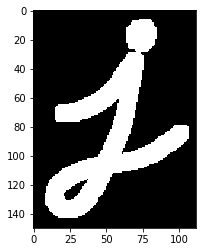

In [6]:
dilation = cv2.dilate(image, kernel, iterations=1)
plt.imshow(dilation, cmap='gray')

## Erosion

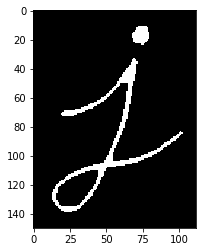

In [7]:
erosion = cv2.erode(image, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')

## Helper Functions for Creating Noisy Images

In [45]:
def add_binary_noise(image, region):
    # random boolean mask for which values to change, weighted towards False to only get a small sample
    mask = np.random.choice([True, False], region[0].shape[0],  p=[1./6, 5./6])
    # region indices to apply noise to
    region_sample = (region[0][mask], region[1][mask])
    # random matrix same shape as image
    r = np.random.rand(*image.shape)*np.max(image)
    # mask image values with random
    image[region_sample] = r[region_sample]
    return image

def add_background_noise(image):
    background = np.where(image==0)
    return add_binary_noise(image, background)

def add_foreground_noise(image):
    foreground = np.nonzero(image)
    return add_binary_noise(image, foreground)

## Opening

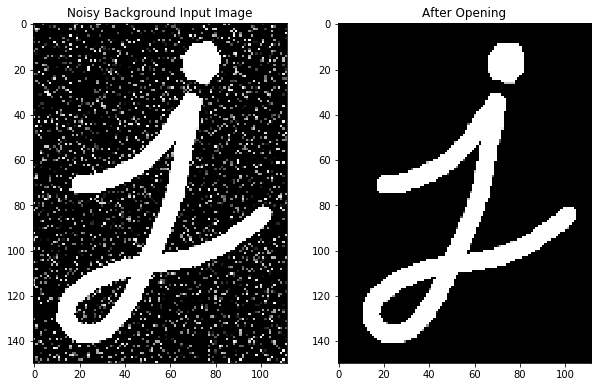

In [46]:
# add some noise to the image background

noisy_background_image = add_background_noise(np.copy(image))
background = np.where(noisy_background_image==0)

opening = cv2.morphologyEx(noisy_background_image, cv2.MORPH_OPEN, kernel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title('Noisy Background Input Image')
ax1.imshow(noisy_background_image, cmap='gray')

ax2.set_title('After Opening')
ax2.imshow(opening, cmap='gray')

## Closing

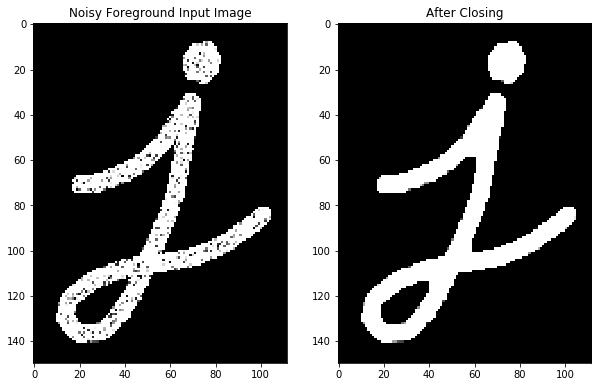

In [47]:
# add some noise to the image foreground
noisy_foreground_image = add_foreground_noise(np.copy(image))

closing = cv2.morphologyEx(noisy_foreground_image, cv2.MORPH_CLOSE, kernel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title('Noisy Foreground Input Image')
ax1.imshow(noisy_foreground_image, cmap='gray')

ax2.set_title('After Closing')
ax2.imshow(closing, cmap='gray')